# SVM Classification Algorithm:

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline
plt.style.use('dark_background')

## Importing and preparing data:

In [2]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
type(iris.feature_names)

list

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [8]:
df['target_names']=df['target'].apply(lambda x:iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Visulaizing data distribution:

In [9]:
df0=df[df['target']==0]
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df1=df[df['target']==1]
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [11]:
df2=df[df['target']==2]
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


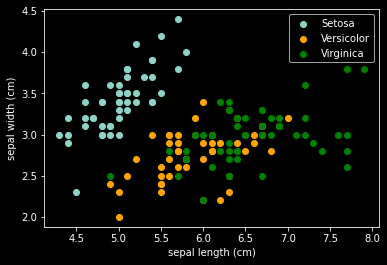

In [12]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],label='Setosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],label='Versicolor',color='orange')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],label='Virginica',color='green')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

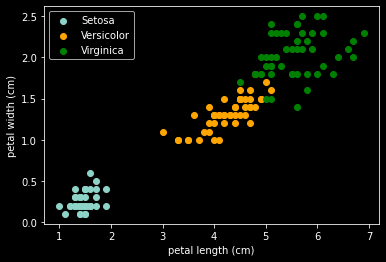

In [13]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],label='Setosa')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],label='Versicolor',color='orange')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],label='Virginica',color='green')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

## Training data to the prediction model:

In [14]:
x=df.drop(['target','target_names'],axis=1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y=df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(len(x_train))
print(len(y_test))

120
30


In [17]:
model1=SVC(kernel='linear')

In [18]:
model1.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
model1.score(x_test,y_test)

0.9333333333333333

In [20]:
model2=SVC(kernel='poly')

In [21]:
model2.fit(x_train,y_train)

SVC(kernel='poly')

In [22]:
model2.score(x_test,y_test)

0.9333333333333333

In [23]:
model3=SVC(kernel='rbf')

In [24]:
model3.fit(x_train,y_train)

SVC()

In [25]:
model3.score(x_test,y_test)

0.9333333333333333

In [26]:
model4=SVC(kernel='sigmoid')

In [27]:
model4.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [28]:
model4.score(x_test,y_test)

0.16666666666666666

In [29]:
model5=SVC(kernel='precomputed')

## Effect of Gamma and Regularization (C):

In [30]:
model=SVC(kernel='linear',gamma=800000)

In [31]:
model.fit(x_train,y_train)

SVC(gamma=800000, kernel='linear')

In [32]:
model.score(x_test,y_test)

0.9333333333333333

In [33]:
model=SVC(kernel='linear',C=100000)
model.fit(x_train,y_train)

SVC(C=100000, kernel='linear')

In [34]:
model.score(x_test,y_test)

0.9333333333333333

In [41]:
model=SVC(kernel='sigmoid',C=1000)

In [42]:
model.fit(x_train,y_train)

SVC(C=1000, kernel='sigmoid')

In [43]:
model.score(x_test,y_test)

0.06666666666666667